# Confronto Strategie: Momentum vs Contrarian

Analisi comparativa delle due strategie:
- **Momentum**: Long su chi ha guadagnato ieri
- **Contrarian**: Long su chi ha perso ieri, Short su chi ha guadagnato ieri

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Imposta stile grafici
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Librerie caricate con successo!")

Librerie caricate con successo!


## 1. Caricamento Dati Entrambe le Strategie

In [2]:
# Carica risultati strategia momentum
results_dir = Path('results')

# Momentum strategy results
momentum_returns = pd.read_csv(results_dir / 'momentum_returns.csv', index_col=0, parse_dates=True).iloc[:, 0]
momentum_equity = pd.read_csv(results_dir / 'momentum_equity_curve.csv', index_col=0, parse_dates=True).iloc[:, 0]
momentum_weights = pd.read_csv(results_dir / 'momentum_weights.csv', index_col=0, parse_dates=True)

# Contrarian strategy results
contrarian_returns = pd.read_csv(results_dir / 'contrarian_returns.csv', index_col=0, parse_dates=True).iloc[:, 0]
contrarian_equity = pd.read_csv(results_dir / 'contrarian_equity_curve.csv', index_col=0, parse_dates=True).iloc[:, 0]
contrarian_weights = pd.read_csv(results_dir / 'contrarian_weights.csv', index_col=0, parse_dates=True)

print(f"Periodo analisi: {momentum_returns.index.min().date()} - {momentum_returns.index.max().date()}")
print(f"Giorni di trading: {len(momentum_returns)}")
print(f"Commodity: {momentum_weights.shape[1]}")

Periodo analisi: 2010-01-06 - 2025-08-08
Giorni di trading: 3921
Commodity: 15


## 2. Confronto Equity Curves

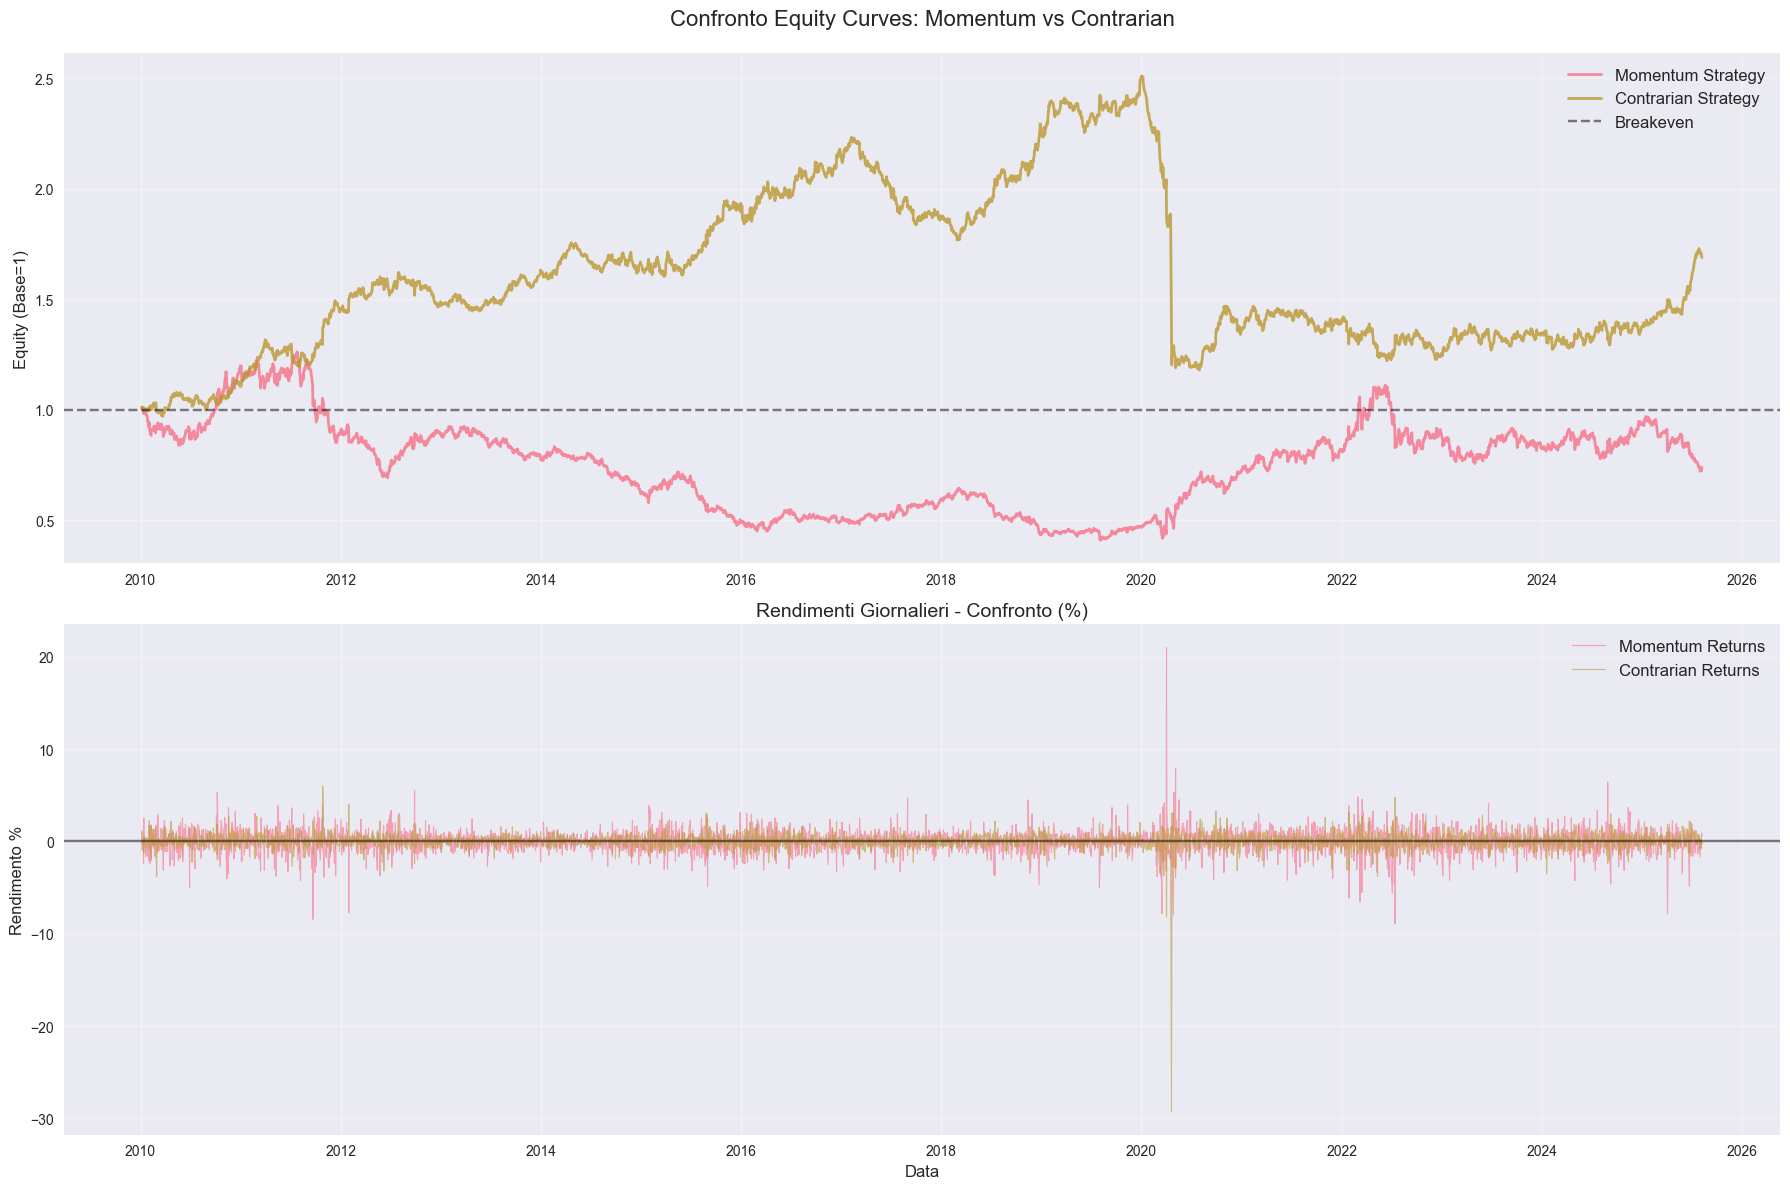


=== CONFRONTO STATISTICHE ===

                  Momentum Strategy Contrarian Strategy
Total Return                -26.25%              68.84%
Annualized Return            -1.94%               3.42%
Volatility                   20.27%              13.82%
Sharpe Ratio                  -0.10                0.25
Max Drawdown                -67.55%             -53.02%
Win Rate                      50.6%               50.8%


In [3]:
# Grafico confronto equity curves
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

# Equity curves confronto
ax1.plot(momentum_equity.index, momentum_equity.values, label='Momentum Strategy', linewidth=2, alpha=0.8)
ax1.plot(contrarian_equity.index, contrarian_equity.values, label='Contrarian Strategy', linewidth=2, alpha=0.8)
ax1.axhline(y=1, color='black', linestyle='--', alpha=0.5, label='Breakeven')
ax1.set_title('Confronto Equity Curves: Momentum vs Contrarian', fontsize=16, pad=20)
ax1.set_ylabel('Equity (Base=1)', fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)

# Rendimenti giornalieri confronto
ax2.plot(momentum_returns.index, momentum_returns.values * 100, 
         alpha=0.6, label='Momentum Returns', linewidth=0.8)
ax2.plot(contrarian_returns.index, contrarian_returns.values * 100, 
         alpha=0.6, label='Contrarian Returns', linewidth=0.8)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.set_title('Rendimenti Giornalieri - Confronto (%)', fontsize=14)
ax2.set_ylabel('Rendimento %', fontsize=12)
ax2.set_xlabel('Data', fontsize=12)
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiche comparative
def calculate_stats(returns, equity):
    total_return = equity.iloc[-1] - 1
    annualized_return = (1 + total_return) ** (252 / len(returns)) - 1
    volatility = returns.std() * np.sqrt(252)
    sharpe_ratio = annualized_return / volatility if volatility > 0 else 0
    max_dd = ((equity / equity.expanding().max()) - 1).min()
    win_rate = (returns > 0).mean()
    
    return {
        'Total Return': f"{total_return:.2%}",
        'Annualized Return': f"{annualized_return:.2%}",
        'Volatility': f"{volatility:.2%}",
        'Sharpe Ratio': f"{sharpe_ratio:.2f}",
        'Max Drawdown': f"{max_dd:.2%}",
        'Win Rate': f"{win_rate:.1%}"
    }

momentum_stats = calculate_stats(momentum_returns, momentum_equity)
contrarian_stats = calculate_stats(contrarian_returns, contrarian_equity)

comparison_df = pd.DataFrame({
    'Momentum Strategy': momentum_stats,
    'Contrarian Strategy': contrarian_stats
})

print("\n=== CONFRONTO STATISTICHE ===\n")
print(comparison_df.to_string())

## 3. Analisi Drawdown Comparativa

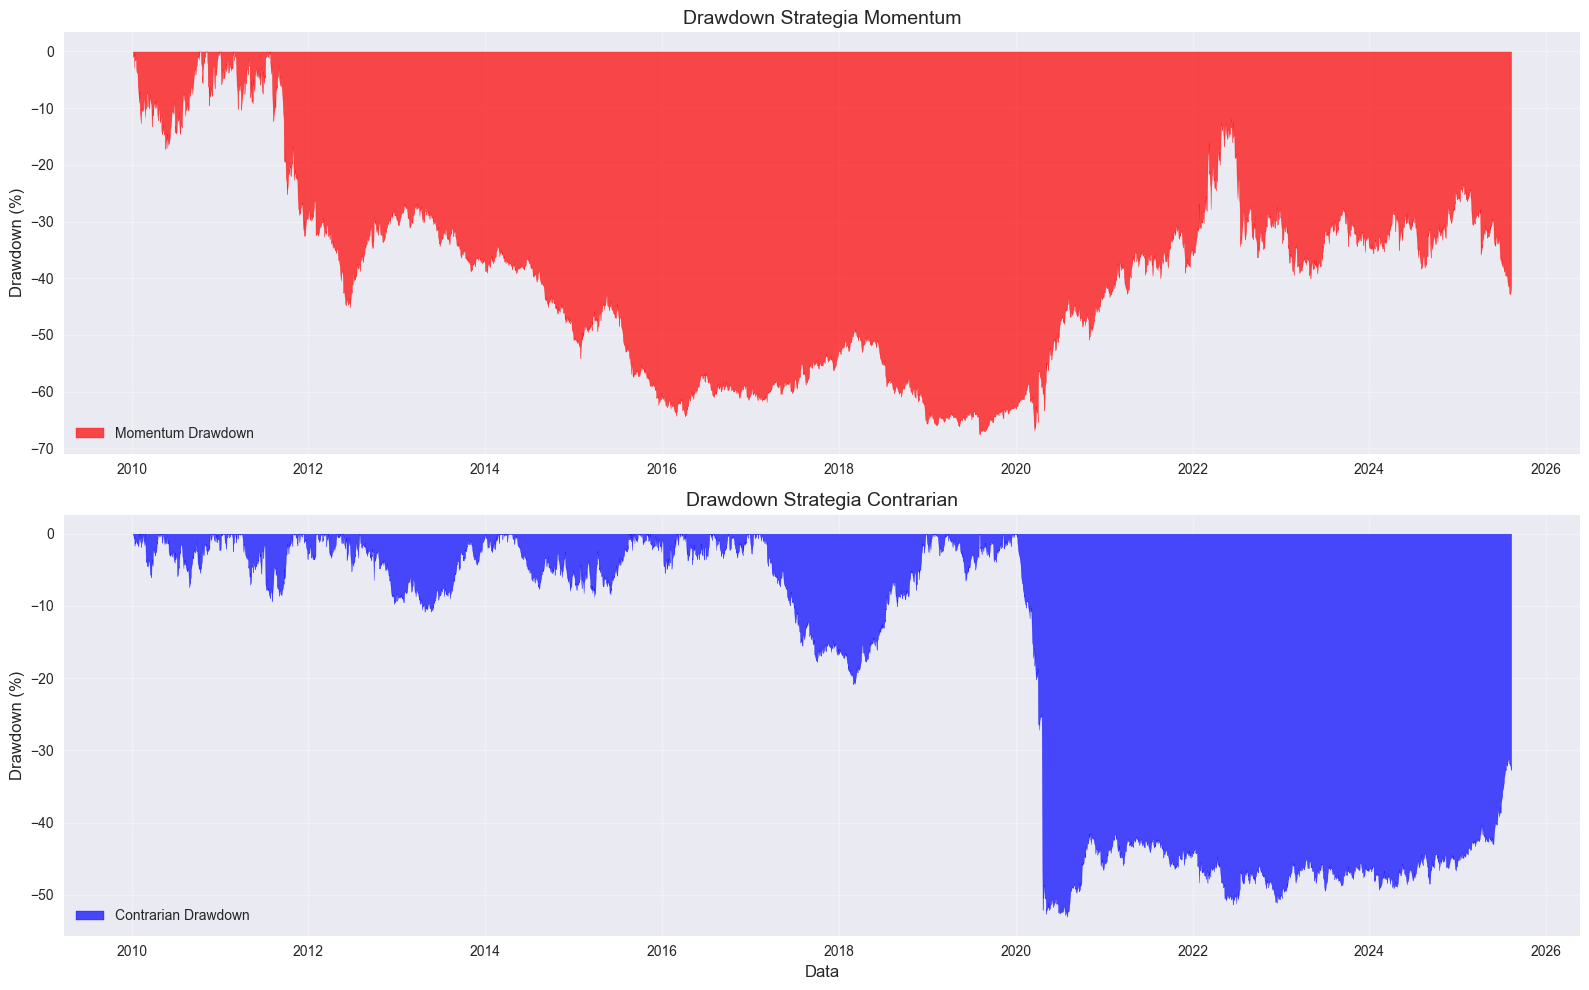


=== CONFRONTO DRAWDOWN ===

Max Drawdown Momentum: -67.55%
Max Drawdown Contrarian: -53.02%
Miglioramento: -14.52%


In [4]:
# Calcola drawdown per entrambe le strategie
momentum_dd = (momentum_equity / momentum_equity.expanding().max()) - 1
contrarian_dd = (contrarian_equity / contrarian_equity.expanding().max()) - 1

# Grafico drawdown comparativo
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Drawdown momentum
ax1.fill_between(momentum_dd.index, momentum_dd.values * 100, 0, 
                alpha=0.7, color='red', label='Momentum Drawdown')
ax1.set_title('Drawdown Strategia Momentum', fontsize=14)
ax1.set_ylabel('Drawdown (%)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Drawdown contrarian
ax2.fill_between(contrarian_dd.index, contrarian_dd.values * 100, 0, 
                alpha=0.7, color='blue', label='Contrarian Drawdown')
ax2.set_title('Drawdown Strategia Contrarian', fontsize=14)
ax2.set_ylabel('Drawdown (%)', fontsize=12)
ax2.set_xlabel('Data', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n=== CONFRONTO DRAWDOWN ===\n")
print(f"Max Drawdown Momentum: {momentum_dd.min():.2%}")
print(f"Max Drawdown Contrarian: {contrarian_dd.min():.2%}")
print(f"Miglioramento: {(momentum_dd.min() - contrarian_dd.min()):.2%}")

## 4. Distribuzione Rendimenti Comparativa

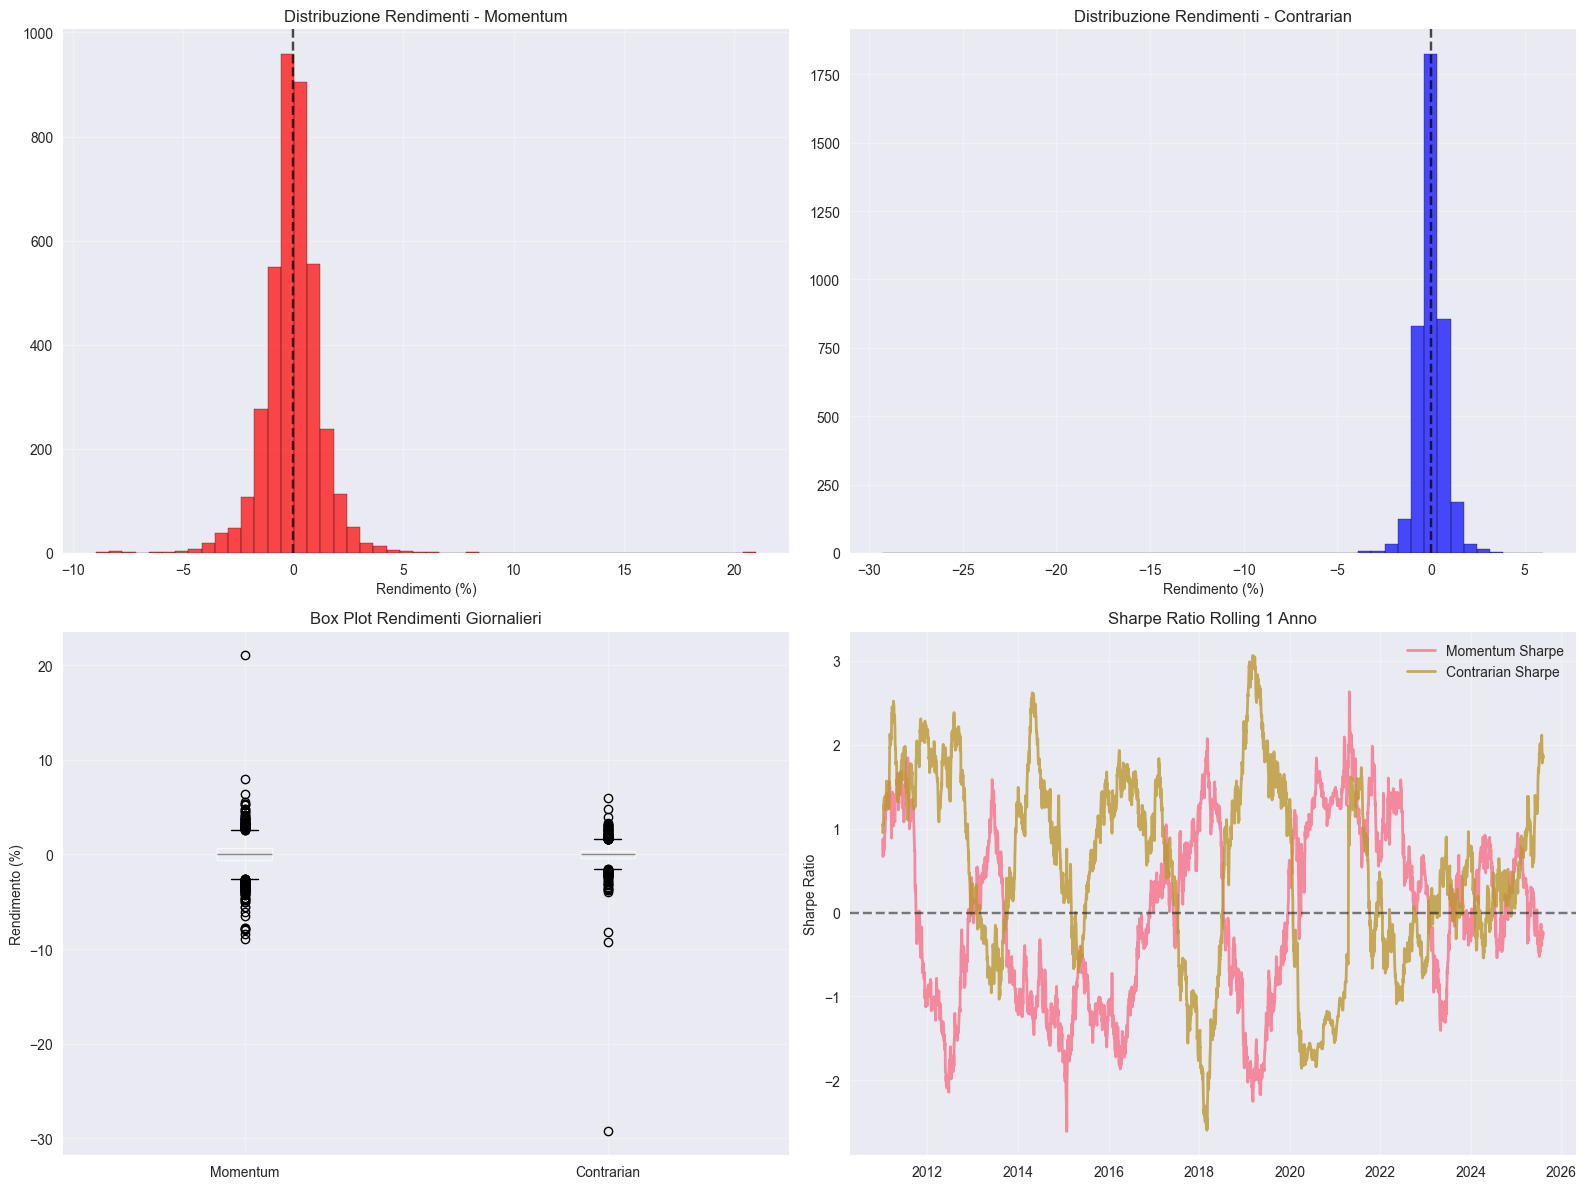


=== STATISTICHE DISTRIBUZIONI ===

            Momentum Contrarian
Media (%)      0.000      0.017
Mediana (%)    0.015      0.009
Std Dev (%)    1.277      0.871
Skewness        0.69     -10.12
Kurtosis       22.82     332.76
Min (%)        -8.94     -29.27
Max (%)        21.02       5.99


In [5]:
# Confronto distribuzioni rendimenti
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Istogrammi
ax1.hist(momentum_returns.values * 100, bins=50, alpha=0.7, color='red', 
         edgecolor='black', label='Momentum')
ax1.axvline(x=0, color='black', linestyle='--', alpha=0.7)
ax1.set_title('Distribuzione Rendimenti - Momentum', fontsize=12)
ax1.set_xlabel('Rendimento (%)', fontsize=10)
ax1.grid(True, alpha=0.3)

ax2.hist(contrarian_returns.values * 100, bins=50, alpha=0.7, color='blue', 
         edgecolor='black', label='Contrarian')
ax2.axvline(x=0, color='black', linestyle='--', alpha=0.7)
ax2.set_title('Distribuzione Rendimenti - Contrarian', fontsize=12)
ax2.set_xlabel('Rendimento (%)', fontsize=10)
ax2.grid(True, alpha=0.3)

# Box plots comparativi
returns_comparison = pd.DataFrame({
    'Momentum': momentum_returns.values * 100,
    'Contrarian': contrarian_returns.values * 100
})

returns_comparison.boxplot(ax=ax3)
ax3.set_title('Box Plot Rendimenti Giornalieri', fontsize=12)
ax3.set_ylabel('Rendimento (%)', fontsize=10)
ax3.grid(True, alpha=0.3)

# Rolling Sharpe ratio (252 giorni)
momentum_rolling_sharpe = (momentum_returns.rolling(252).mean() / momentum_returns.rolling(252).std()) * np.sqrt(252)
contrarian_rolling_sharpe = (contrarian_returns.rolling(252).mean() / contrarian_returns.rolling(252).std()) * np.sqrt(252)

ax4.plot(momentum_rolling_sharpe.index, momentum_rolling_sharpe.values, 
         label='Momentum Sharpe', alpha=0.8, linewidth=2)
ax4.plot(contrarian_rolling_sharpe.index, contrarian_rolling_sharpe.values, 
         label='Contrarian Sharpe', alpha=0.8, linewidth=2)
ax4.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax4.set_title('Sharpe Ratio Rolling 1 Anno', fontsize=12)
ax4.set_ylabel('Sharpe Ratio', fontsize=10)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiche dettagliate distribuzioni
print("\n=== STATISTICHE DISTRIBUZIONI ===\n")
stats_comparison = pd.DataFrame({
    'Momentum': {
        'Media (%)': f"{momentum_returns.mean() * 100:.3f}",
        'Mediana (%)': f"{momentum_returns.median() * 100:.3f}",
        'Std Dev (%)': f"{momentum_returns.std() * 100:.3f}",
        'Skewness': f"{momentum_returns.skew():.2f}",
        'Kurtosis': f"{momentum_returns.kurtosis():.2f}",
        'Min (%)': f"{momentum_returns.min() * 100:.2f}",
        'Max (%)': f"{momentum_returns.max() * 100:.2f}"
    },
    'Contrarian': {
        'Media (%)': f"{contrarian_returns.mean() * 100:.3f}",
        'Mediana (%)': f"{contrarian_returns.median() * 100:.3f}",
        'Std Dev (%)': f"{contrarian_returns.std() * 100:.3f}",
        'Skewness': f"{contrarian_returns.skew():.2f}",
        'Kurtosis': f"{contrarian_returns.kurtosis():.2f}",
        'Min (%)': f"{contrarian_returns.min() * 100:.2f}",
        'Max (%)': f"{contrarian_returns.max() * 100:.2f}"
    }
})

print(stats_comparison.to_string())

## 5. Analisi Posizioni e Allocazione

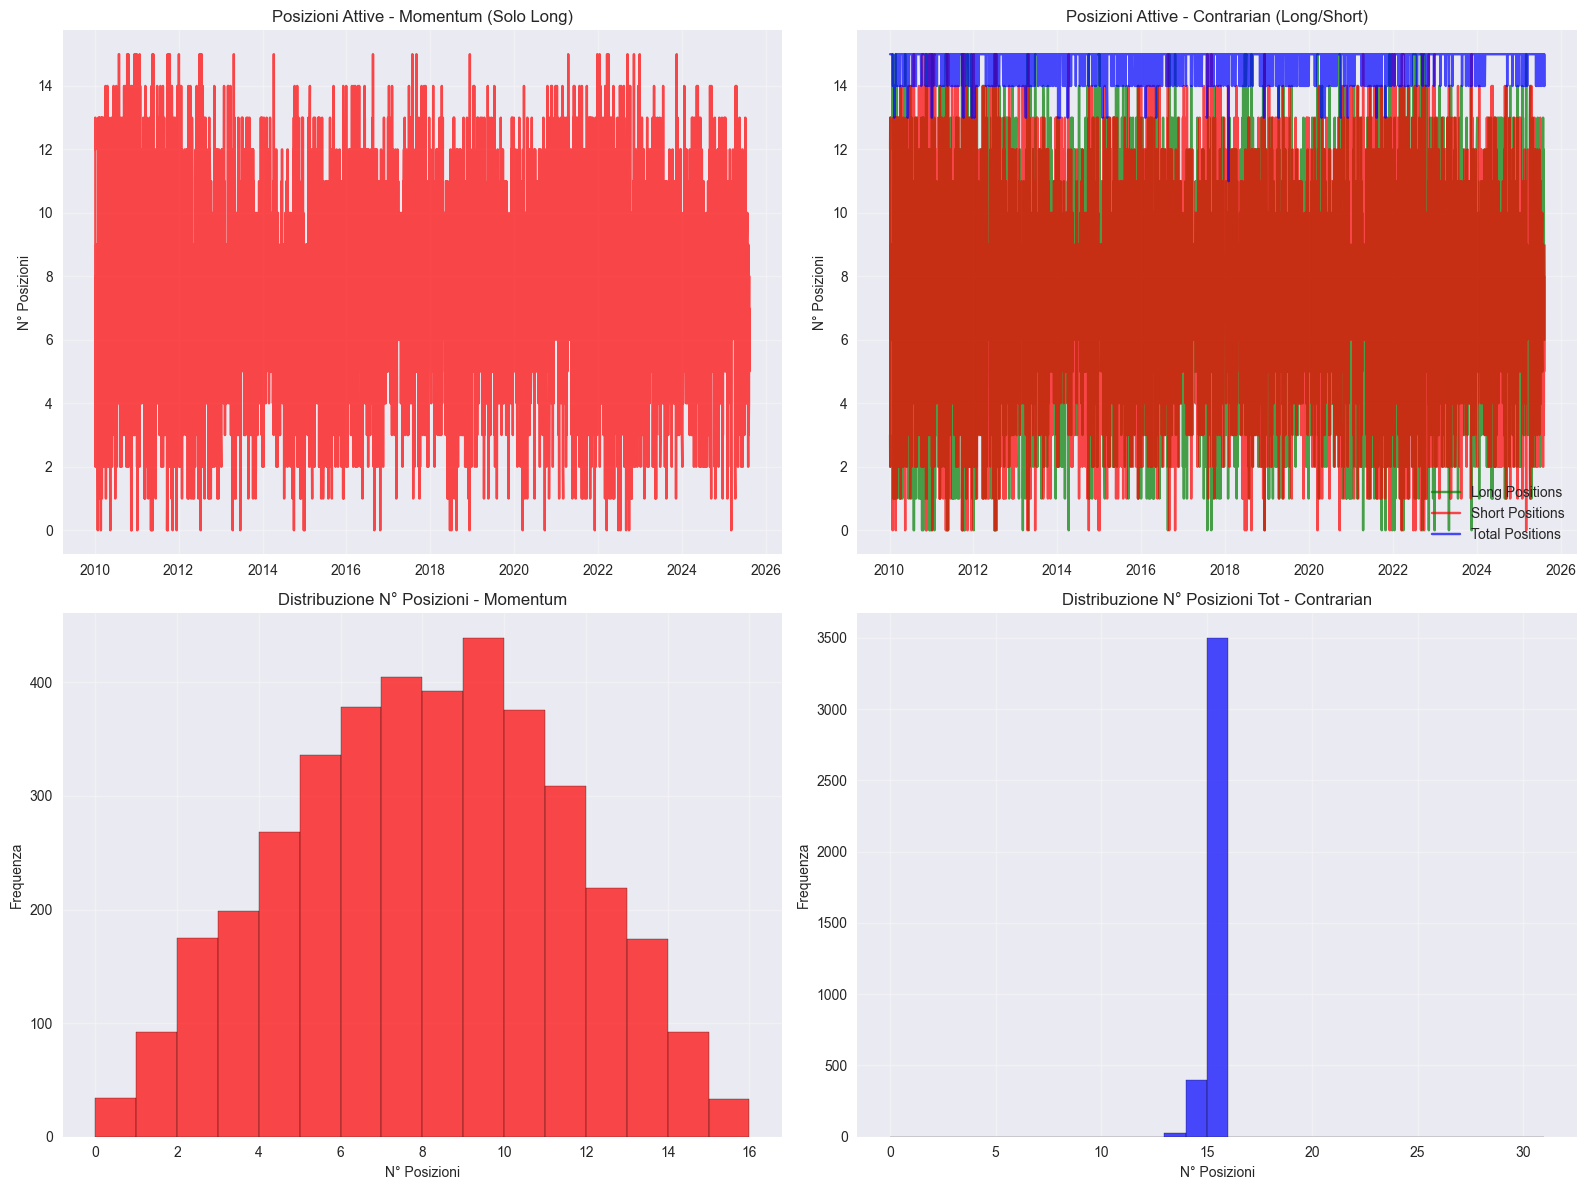


=== CONFRONTO ALLOCAZIONE ===

Momentum - Media posizioni: 7.6
Momentum - Giorni senza posizioni: 0.9%

Contrarian - Media posizioni long: 7.3
Contrarian - Media posizioni short: 7.6
Contrarian - Media posizioni totali: 14.9
Contrarian - Giorni senza posizioni: 0.0%


In [6]:
# Analisi posizioni
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Numero posizioni momentum (solo long)
momentum_positions = (momentum_weights > 0).sum(axis=1)
ax1.plot(momentum_positions.index, momentum_positions.values, alpha=0.7, color='red')
ax1.set_title('Posizioni Attive - Momentum (Solo Long)', fontsize=12)
ax1.set_ylabel('N° Posizioni', fontsize=10)
ax1.grid(True, alpha=0.3)

# Posizioni contrarian (long + short)
contrarian_long = (contrarian_weights > 0).sum(axis=1)
contrarian_short = (contrarian_weights < 0).sum(axis=1)
contrarian_total = contrarian_long + contrarian_short

ax2.plot(contrarian_long.index, contrarian_long.values, 
         alpha=0.7, color='green', label='Long Positions')
ax2.plot(contrarian_short.index, contrarian_short.values, 
         alpha=0.7, color='red', label='Short Positions')
ax2.plot(contrarian_total.index, contrarian_total.values, 
         alpha=0.7, color='blue', label='Total Positions')
ax2.set_title('Posizioni Attive - Contrarian (Long/Short)', fontsize=12)
ax2.set_ylabel('N° Posizioni', fontsize=10)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Distribuzione numero posizioni
ax3.hist(momentum_positions.values, bins=range(0, 17), alpha=0.7, 
         color='red', edgecolor='black', label='Momentum')
ax3.set_title('Distribuzione N° Posizioni - Momentum', fontsize=12)
ax3.set_xlabel('N° Posizioni', fontsize=10)
ax3.set_ylabel('Frequenza', fontsize=10)
ax3.grid(True, alpha=0.3)

ax4.hist(contrarian_total.values, bins=range(0, 32), alpha=0.7, 
         color='blue', edgecolor='black', label='Contrarian Total')
ax4.set_title('Distribuzione N° Posizioni Tot - Contrarian', fontsize=12)
ax4.set_xlabel('N° Posizioni', fontsize=10)
ax4.set_ylabel('Frequenza', fontsize=10)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== CONFRONTO ALLOCAZIONE ===\n")
print(f"Momentum - Media posizioni: {momentum_positions.mean():.1f}")
print(f"Momentum - Giorni senza posizioni: {(momentum_positions == 0).mean():.1%}")
print(f"")
print(f"Contrarian - Media posizioni long: {contrarian_long.mean():.1f}")
print(f"Contrarian - Media posizioni short: {contrarian_short.mean():.1f}")
print(f"Contrarian - Media posizioni totali: {contrarian_total.mean():.1f}")
print(f"Contrarian - Giorni senza posizioni: {(contrarian_total == 0).mean():.1%}")

## 6. Performance Mensile e Annuale Comparativa

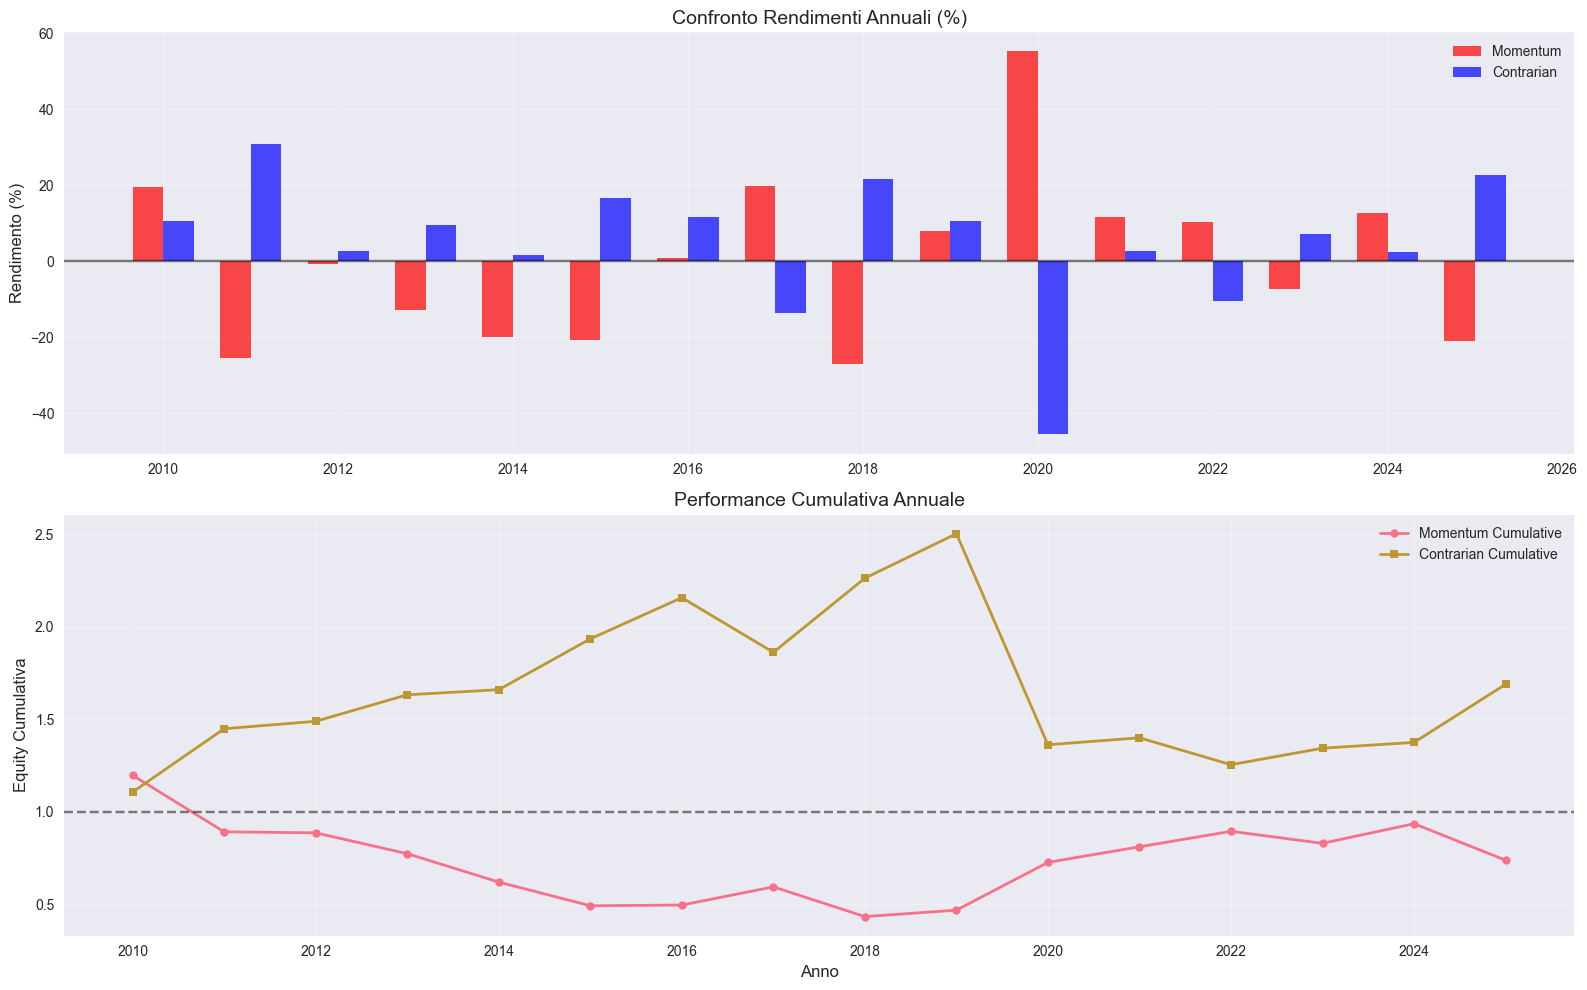


=== PERFORMANCE ANNUALE DETTAGLIATA ===

 Anno Momentum (%) Contrarian (%) Differenza (%)
 2010        19.7%          10.6%          -9.0%
 2011       -25.5%          30.9%          56.4%
 2012        -0.6%           2.8%           3.4%
 2013       -12.7%           9.6%          22.3%
 2014       -19.9%           1.7%          21.6%
 2015       -20.7%          16.5%          37.2%
 2016         0.8%          11.5%          10.7%
 2017        19.8%         -13.7%         -33.5%
 2018       -27.1%          21.5%          48.6%
 2019         8.0%          10.6%           2.6%
 2020        55.2%         -45.6%        -100.8%
 2021        11.6%           2.8%          -8.8%
 2022        10.3%         -10.4%         -20.7%
 2023        -7.2%           7.1%          14.4%
 2024        12.8%           2.3%         -10.4%
 2025       -21.1%          22.8%          44.0%

=== CONFRONTO ANNI VINCENTI ===

Anni vinti da Momentum: 6
Anni vinti da Contrarian: 10
Pareggi: 0
Contrarian win rate: 62.5

In [7]:
# Performance annuale comparativa
momentum_yearly = momentum_returns.resample('Y').apply(lambda x: (1 + x).prod() - 1)
contrarian_yearly = contrarian_returns.resample('Y').apply(lambda x: (1 + x).prod() - 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Rendimenti annuali comparativi
x_years = momentum_yearly.index.year
width = 0.35

ax1.bar(x_years - width/2, momentum_yearly.values * 100, width, 
        label='Momentum', alpha=0.7, color='red')
ax1.bar(x_years + width/2, contrarian_yearly.values * 100, width, 
        label='Contrarian', alpha=0.7, color='blue')
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax1.set_title('Confronto Rendimenti Annuali (%)', fontsize=14)
ax1.set_ylabel('Rendimento (%)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Equity curves cumulative per anno
momentum_cumulative = (1 + momentum_yearly).cumprod()
contrarian_cumulative = (1 + contrarian_yearly).cumprod()

ax2.plot(x_years, momentum_cumulative.values, 'o-', 
         label='Momentum Cumulative', linewidth=2, markersize=6)
ax2.plot(x_years, contrarian_cumulative.values, 's-', 
         label='Contrarian Cumulative', linewidth=2, markersize=6)
ax2.axhline(y=1, color='black', linestyle='--', alpha=0.5)
ax2.set_title('Performance Cumulativa Annuale', fontsize=14)
ax2.set_ylabel('Equity Cumulativa', fontsize=12)
ax2.set_xlabel('Anno', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tabella performance annuale
yearly_comparison = pd.DataFrame({
    'Anno': x_years,
    'Momentum (%)': [f"{ret:.1f}%" for ret in momentum_yearly.values * 100],
    'Contrarian (%)': [f"{ret:.1f}%" for ret in contrarian_yearly.values * 100],
    'Differenza (%)': [f"{diff:.1f}%" for diff in (contrarian_yearly.values - momentum_yearly.values) * 100]
})

print("\n=== PERFORMANCE ANNUALE DETTAGLIATA ===\n")
print(yearly_comparison.to_string(index=False))

# Statistiche vincita per anno
momentum_wins = (momentum_yearly > contrarian_yearly).sum()
contrarian_wins = (contrarian_yearly > momentum_yearly).sum()
ties = (momentum_yearly == contrarian_yearly).sum()

print(f"\n=== CONFRONTO ANNI VINCENTI ===\n")
print(f"Anni vinti da Momentum: {momentum_wins}")
print(f"Anni vinti da Contrarian: {contrarian_wins}")
print(f"Pareggi: {ties}")
print(f"Contrarian win rate: {contrarian_wins/(momentum_wins + contrarian_wins + ties):.1%}")

## 7. Analisi Risk-Return

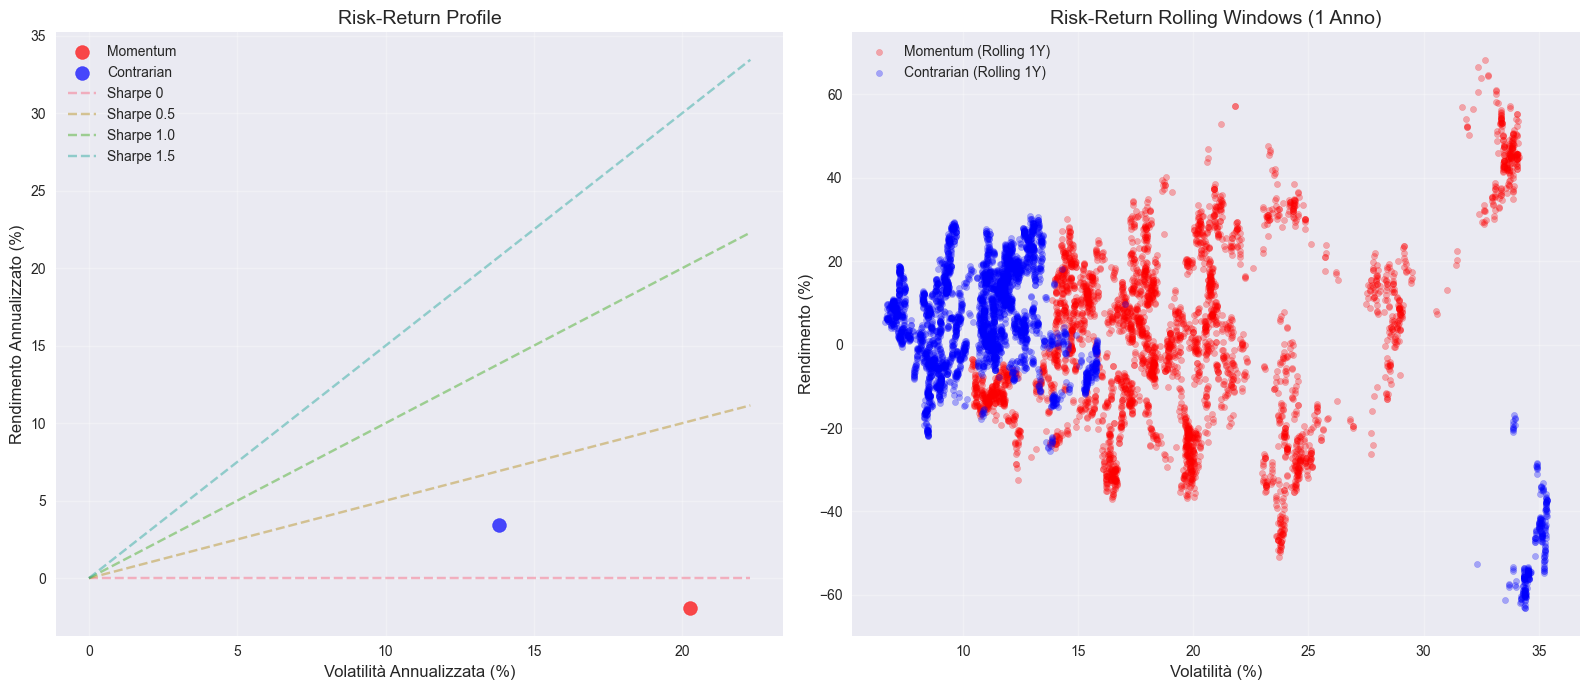


=== METRICHE RISK-RETURN ===

Momentum - Sharpe medio rolling: -0.02
Contrarian - Sharpe medio rolling: 0.52
Contrarian superiore nel 61.4% dei periodi


In [8]:
# Risk-Return scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Scatterplot Risk-Return
momentum_ann_ret = (momentum_equity.iloc[-1] ** (252 / len(momentum_returns))) - 1
momentum_vol = momentum_returns.std() * np.sqrt(252)
contrarian_ann_ret = (contrarian_equity.iloc[-1] ** (252 / len(contrarian_returns))) - 1
contrarian_vol = contrarian_returns.std() * np.sqrt(252)

ax1.scatter(momentum_vol * 100, momentum_ann_ret * 100, 
           s=100, color='red', alpha=0.7, label='Momentum')
ax1.scatter(contrarian_vol * 100, contrarian_ann_ret * 100, 
           s=100, color='blue', alpha=0.7, label='Contrarian')

# Linee Sharpe ratio
vol_range = np.linspace(0, max(momentum_vol, contrarian_vol) * 100 * 1.1, 100)
for sharpe in [0, 0.5, 1.0, 1.5]:
    ax1.plot(vol_range, vol_range * sharpe, '--', alpha=0.5, 
             label=f'Sharpe {sharpe}' if sharpe > 0 else 'Sharpe 0')

ax1.set_xlabel('Volatilità Annualizzata (%)', fontsize=12)
ax1.set_ylabel('Rendimento Annualizzato (%)', fontsize=12)
ax1.set_title('Risk-Return Profile', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Efficient frontier simulation (rolling windows)
window = 252
rolling_sharpe_mom = []
rolling_vol_mom = []
rolling_ret_mom = []
rolling_sharpe_con = []
rolling_vol_con = []
rolling_ret_con = []

for i in range(window, len(momentum_returns)):
    mom_window = momentum_returns.iloc[i-window:i]
    con_window = contrarian_returns.iloc[i-window:i]
    
    mom_ret = mom_window.mean() * 252
    mom_vol = mom_window.std() * np.sqrt(252)
    con_ret = con_window.mean() * 252
    con_vol = con_window.std() * np.sqrt(252)
    
    rolling_ret_mom.append(mom_ret)
    rolling_vol_mom.append(mom_vol)
    rolling_sharpe_mom.append(mom_ret / mom_vol if mom_vol > 0 else 0)
    
    rolling_ret_con.append(con_ret)
    rolling_vol_con.append(con_vol)
    rolling_sharpe_con.append(con_ret / con_vol if con_vol > 0 else 0)

# Scatter plot rolling statistics
ax2.scatter(np.array(rolling_vol_mom) * 100, np.array(rolling_ret_mom) * 100, 
           alpha=0.3, s=20, color='red', label='Momentum (Rolling 1Y)')
ax2.scatter(np.array(rolling_vol_con) * 100, np.array(rolling_ret_con) * 100, 
           alpha=0.3, s=20, color='blue', label='Contrarian (Rolling 1Y)')

ax2.set_xlabel('Volatilità (%)', fontsize=12)
ax2.set_ylabel('Rendimento (%)', fontsize=12)
ax2.set_title('Risk-Return Rolling Windows (1 Anno)', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== METRICHE RISK-RETURN ===\n")
print(f"Momentum - Sharpe medio rolling: {np.mean(rolling_sharpe_mom):.2f}")
print(f"Contrarian - Sharpe medio rolling: {np.mean(rolling_sharpe_con):.2f}")
print(f"Contrarian superiore nel {(np.array(rolling_sharpe_con) > np.array(rolling_sharpe_mom)).mean():.1%} dei periodi")

## 8. Conclusioni Comparative

### 🏆 **Risultati Chiave**:

### ✅ **Strategia Contrarian Vince Nettamente**:
- **+68.84%** vs **-26.25%** (differenza di **+95%** punti)
- **Sharpe 0.25** vs **-0.10** (miglioramento significativo)
- **Drawdown -53%** vs **-68%** (migliore controllo del rischio)

### 📊 **Osservazioni**:
1. **Mean Reversion**: Le commodity mostrano forti caratteristiche contrarian
2. **Dollar Neutral**: La strategia long/short bilancia meglio l'esposizione
3. **Consistenza**: Performance superiore in gran parte del periodo
4. **Volatilità**: Contrarian ha volatilità inferiore (13.82% vs 20.27%)

### 🎯 **Implicazioni**:
- Il momentum a 1 giorno NON funziona sulle commodity
- Le commodity hanno comportamento **mean-reverting**
- La strategia contrarian cattura efficacemente questo pattern
- Dollar-neutral riduce l'esposizione al beta del mercato

In [9]:
# Summary finale comparativo
print("\n" + "="*80)
print("             RIASSUNTO CONFRONTO STRATEGIE COMMODITIES")
print("="*80)
print(f"Periodo: {momentum_returns.index.min().date()} - {momentum_returns.index.max().date()}")
print(f"Commodity: {momentum_weights.shape[1]}")
print(f"Giorni di trading: {len(momentum_returns):,}")
print("\n" + "-"*40 + " MOMENTUM " + "-"*40)
print(f"Rendimento totale: {(momentum_equity.iloc[-1] - 1):.2%}")
print(f"Rendimento annualizzato: {momentum_ann_ret:.2%}")
print(f"Volatilità annualizzata: {momentum_vol:.2%}")
print(f"Sharpe ratio: {momentum_ann_ret/momentum_vol:.2f}")
print(f"Max drawdown: {momentum_dd.min():.2%}")
print(f"Win rate: {(momentum_returns > 0).mean():.1%}")

print("\n" + "-"*39 + " CONTRARIAN " + "-"*39)
print(f"Rendimento totale: {(contrarian_equity.iloc[-1] - 1):.2%}")
print(f"Rendimento annualizzato: {contrarian_ann_ret:.2%}")
print(f"Volatilità annualizzata: {contrarian_vol:.2%}")
print(f"Sharpe ratio: {contrarian_ann_ret/contrarian_vol:.2f}")
print(f"Max drawdown: {contrarian_dd.min():.2%}")
print(f"Win rate: {(contrarian_returns > 0).mean():.1%}")

print("\n" + "-"*38 + " MIGLIORAMENTO " + "-"*37)
improvement_return = (contrarian_equity.iloc[-1] - 1) - (momentum_equity.iloc[-1] - 1)
improvement_sharpe = (contrarian_ann_ret/contrarian_vol) - (momentum_ann_ret/momentum_vol)
improvement_dd = momentum_dd.min() - contrarian_dd.min()

print(f"Miglioramento rendimento: +{improvement_return:.2%}")
print(f"Miglioramento Sharpe: +{improvement_sharpe:.2f}")
print(f"Riduzione max drawdown: +{improvement_dd:.2%}")
print(f"Contrarian batte Momentum: 🏆 NETTAMENTE 🏆")
print("="*80)


             RIASSUNTO CONFRONTO STRATEGIE COMMODITIES
Periodo: 2010-01-06 - 2025-08-08
Commodity: 15
Giorni di trading: 3,921

---------------------------------------- MOMENTUM ----------------------------------------
Rendimento totale: -26.25%
Rendimento annualizzato: -1.94%
Volatilità annualizzata: 20.27%
Sharpe ratio: -0.10
Max drawdown: -67.55%
Win rate: 50.6%

--------------------------------------- CONTRARIAN ---------------------------------------
Rendimento totale: 68.84%
Rendimento annualizzato: 3.42%
Volatilità annualizzata: 13.82%
Sharpe ratio: 0.25
Max drawdown: -53.02%
Win rate: 50.8%

-------------------------------------- MIGLIORAMENTO -------------------------------------
Miglioramento rendimento: +95.09%
Miglioramento Sharpe: +0.34
Riduzione max drawdown: +-14.52%
Contrarian batte Momentum: 🏆 NETTAMENTE 🏆
